# [作業目標]
- 利用範例的創建方式, 創建一組資料, 並練習如何取出最大值

# [作業重點]
- 練習創立 DataFrame (In[2])
- 如何取出口數最多的國家 (In[3], Out[3])

## 練習時間
在小量的資料上，我們用眼睛就可以看得出來程式碼是否有跑出我們理想中的結果

請嘗試想像一個你需要的資料結構 (裡面的值可以是隨機的)，然後用上述的方法把它變成 pandas DataFrame

#### Ex: 想像一個 dataframe 有兩個欄位，一個是國家，一個是人口，求人口數最多的國家

### Hints: [隨機產生數值](https://blog.csdn.net/christianashannon/article/details/78867204)

In [1]:
import pandas as pd
import numpy as np
import random, string

In [2]:
num_row = np.random.randint(1e3)
letters = string.ascii_letters
data = {'國家':  [''.join(random.choice(letters) for i in range(np.random.randint(1,10))) for j in range(num_row)],
        '人口': np.random.randint(1e8, size=num_row)}
df = pd.DataFrame(data)

In [3]:
print(df.loc[df['人口'].idxmax()])

國家       SpDWa
人口    99606971
Name: 208, dtype: object


## 讀取 txt 檔
* 請讀取 [text file](https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt)
* 懶人複製連結: https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt

### Hints: 使用 [Request](https://blog.gtwang.org/programming/python-requests-module-tutorial/) 抓取資料
### Hints: [字串分割](http://www.runoob.com/python/att-string-split.html)
### Hints: 例外處理: [Try-Except](https://pydoing.blogspot.com/2011/01/python-try.html)

# [作業目標]
- 試著讀取網頁上的圖片連結清單, 再以清單中網址讀取圖片

# [作業重點]
- 從網頁上讀取連結清單 (In[1], In[2])
- 從清單網址讀取圖片 (In[6]~In[9], Out[6]~Out[9])

In [4]:
## 假如我們不想把資料載到自己的電腦裡?
# 把連結填入
target_url = 'https://raw.githubusercontent.com/vashineyu/slides_and_others/master/tutorial/examples/imagenet_urls_examples.txt'

In [5]:
import requests
response = requests.get(target_url)
data = response.text
# 用 request 傳送回來的資料不會認得斷行符號
print(len(data))
data[0:100]

784594


'n00015388_157\thttp://farm1.static.flickr.com/145/430300483_21e993670c.jpg\nn00015388_238\thttp://farm2'

In [6]:
# 找到換行符號，用該符號做字串分割後，把它拿掉
import re
pattern = re.compile(r'http.+jpg')
res = pattern.findall(data)
print(len(res))
res[0]

9442


'http://farm1.static.flickr.com/145/430300483_21e993670c.jpg'

## 將 txt 轉成 pandas dataframe

In [7]:
import pandas as pd

df = pd.DataFrame({'url':res})
df.head()

,url
0,http://farm1.static.flickr.com/145/430300483_2...
1,http://farm2.static.flickr.com/1005/3352960681...
2,http://farm1.static.flickr.com/27/51009336_a96...
3,http://farm4.static.flickr.com/3025/2444687979...
4,http://img100.imageshack.us/img100/3253/forres...


## 讀取圖片，請讀取上面 data frame 中的前 5 張圖片

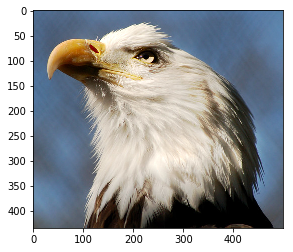

In [8]:
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 請用 df.loc[...] 得到第一筆資料的連結
first_link = df.loc[0,'url']

response = requests.get(first_link)
img = Image.open(BytesIO(response.content))

# Convert img to numpy array

plt.imshow(img)
plt.show()

In [9]:
def img2arr_fromURLs(url_list, resize = False):
    """
    請完成這個 Function
    Args
        - url_list: list of URLs
        - resize: bool
    Return
        - list of array
    """
    def get_image(x):
        try:
            return Image.open(BytesIO(requests.get(x).content))
        except OSError:
            print('{url} is a dead link.'.format(url=x))
    img_list = filter(None, map(get_image, url_list))
    if resize:
        img_list = map(lambda x: x.resize((500, 500),Image.ANTIALIAS), img_list)
    return list(img_list)

http://img100.imageshack.us/img100/3253/forrest004fs9.jpg is a dead link.
Total images that we got: 4 


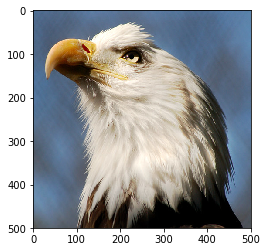

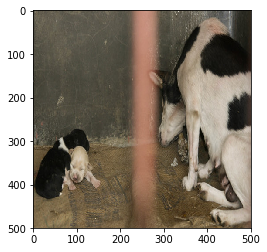

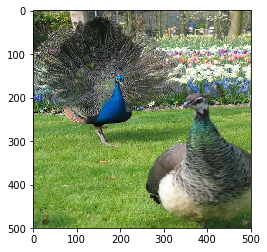

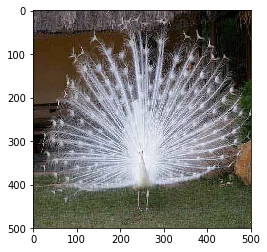

In [10]:
result = img2arr_fromURLs(df['url'][0:5].values, True)
print("Total images that we got: %i " % len(result)) # 如果不等於 5, 代表有些連結失效囉

for im_get in result:
    plt.imshow(im_get)
    plt.show()